In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# Load dataset using data_loader
from src.data_loader import load_dataset

In [40]:
file_path = r"C:\ecommerce_churn_prediction\data\raw\E Commerce Dataset.xlsx"
df = load_dataset(file_path)

2025-04-12 18:48:21,736 - src.data_loader - INFO - Dataset loaded successfully from C:\ecommerce_churn_prediction\data\raw\E Commerce Dataset.xlsx
2025-04-12 18:48:21,738 - src.data_loader - INFO - Dataset shape: (5630, 20)


In [42]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (5630, 20)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 n

In [43]:
print("\nDataset Preview:")
print(df.head())


Dataset Preview:
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore Mar

In [44]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64


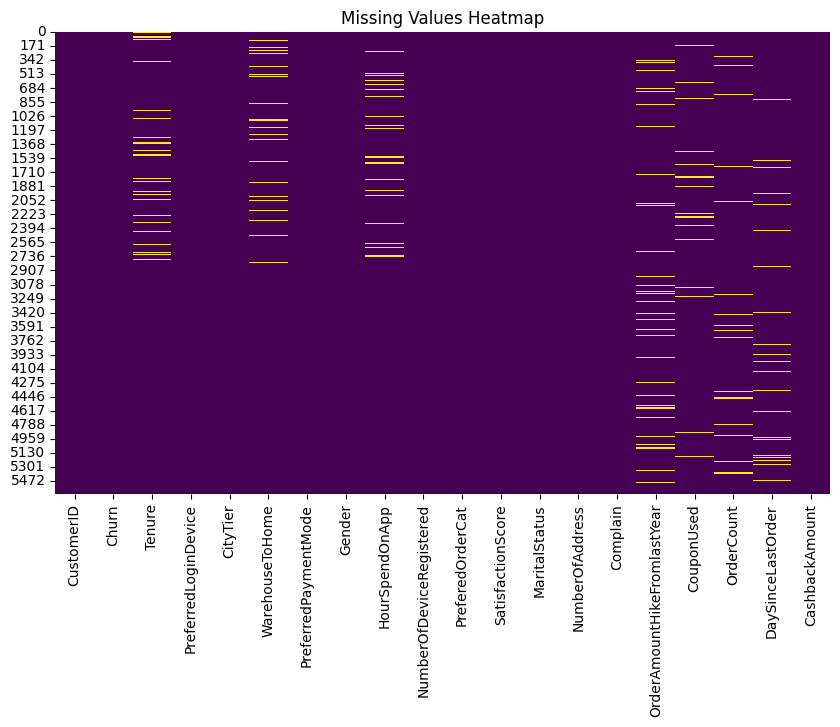

In [45]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [47]:
# Summary statistics for numeric features
numeric_features = df.select_dtypes(include=[float, int]).columns.tolist()
print("\nSummary Statistics for Numeric Features:")
print(df[numeric_features].describe())


Summary Statistics for Numeric Features:
         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926               

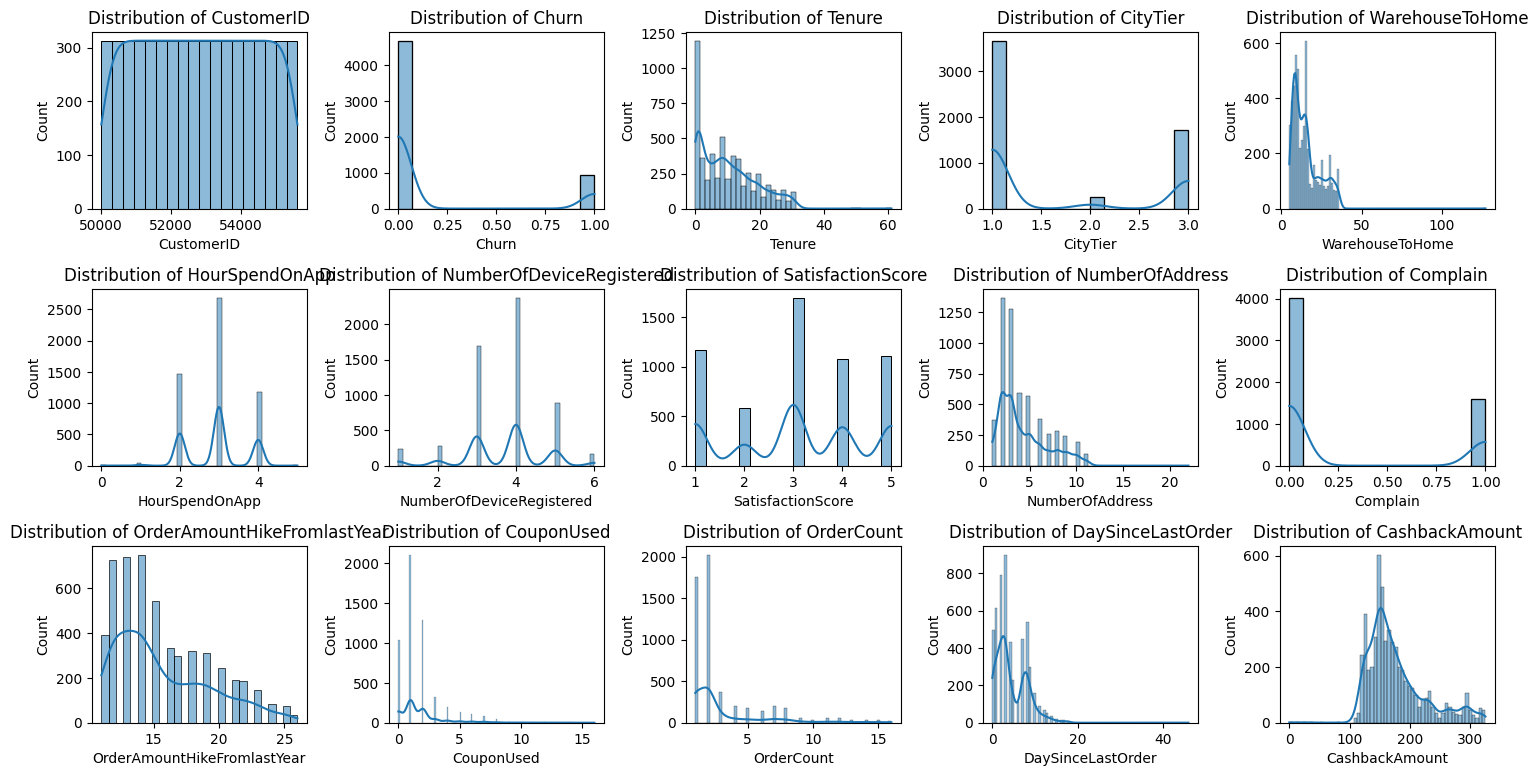

In [48]:
# Distribution plots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

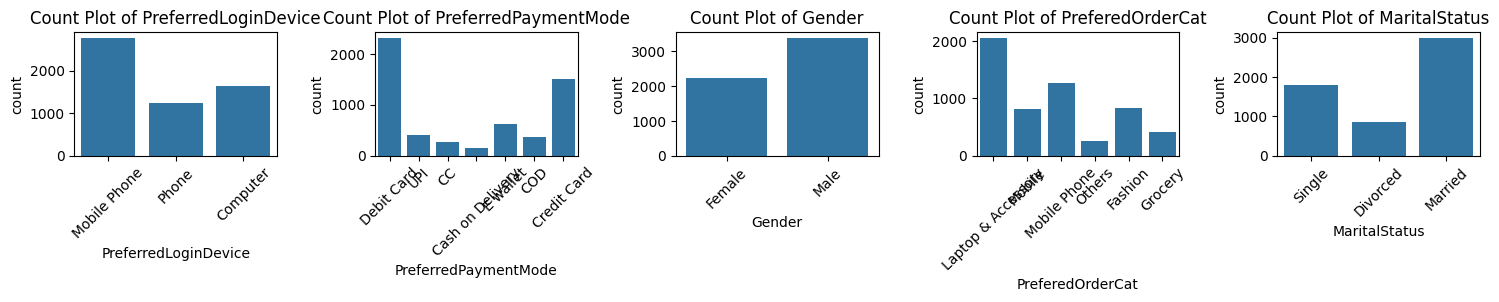

In [49]:
# Count plots for categorical features
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 5, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

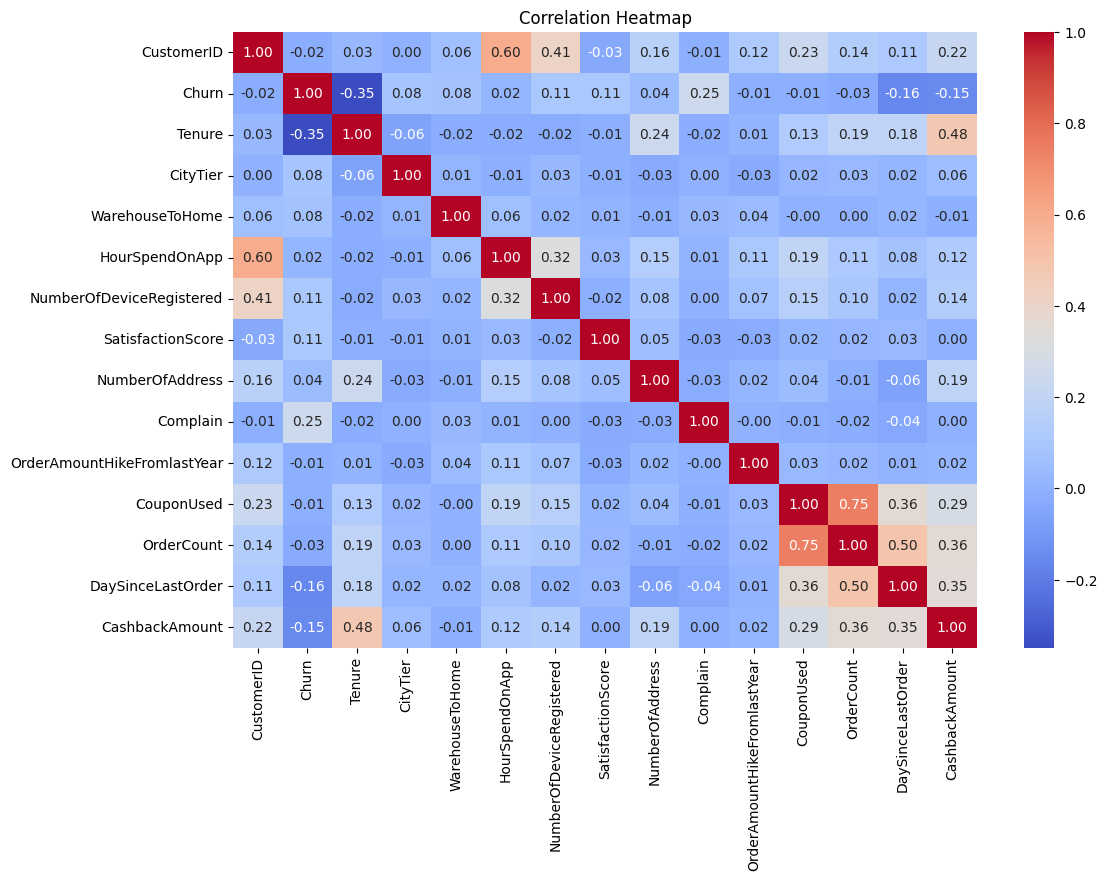

In [50]:
# Correlation analysis for numeric features
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


2025-04-12 18:50:36,850 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-12 18:50:36,868 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


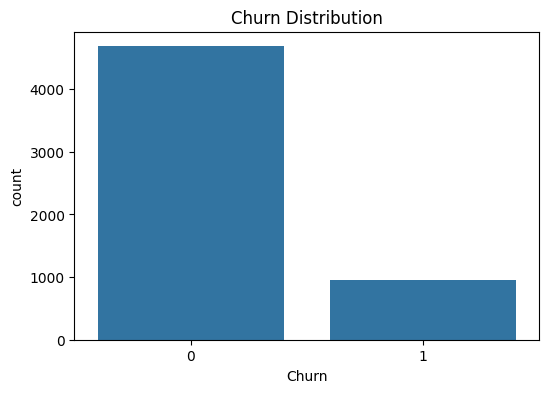


Churn Rate (%):
Churn
0    83.161634
1    16.838366
Name: proportion, dtype: float64


In [51]:
# Analyze Churn distribution (target variable)
if "Churn" in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x="Churn")
    plt.title("Churn Distribution")
    plt.show()

    churn_rate = df["Churn"].value_counts(normalize=True) * 100
    print("\nChurn Rate (%):")
    print(churn_rate)